### 强化学习

#### 悬崖寻路问题

如图，智能体处于一个4×12的网格地图的左下角，这里是它的起点，而右下角的钻石处是它的终点。智能体每次可以执行向上、向下、向左或向右移动一步的动作，第𝑡步会得到−1×𝛾𝑡(在初始状态执行动作时，记作𝑡=0)单位的奖励。所以智能体希望尽可能快地走到终点处。
当智能体走到终点时，任务结束。除此之外，我们还对一些特殊情况进行限定：
智能体不能移出网格，如果智能体想执行某个动作移出网格，那么这一步智能体不能够移动，但仍然得到-1单位的奖励。
图中阴影部分的地方是悬崖，如果智能体“掉入悬崖” ，会马上回到起点位置，并获得-100单位的奖励。

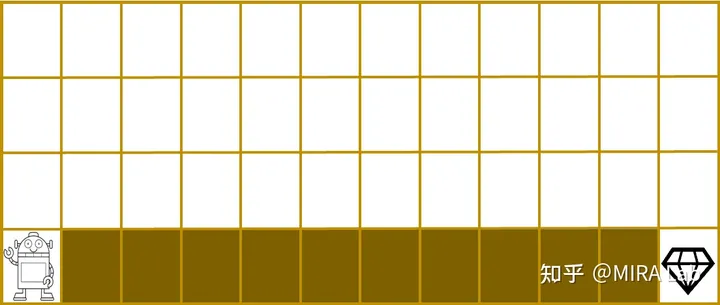

In [24]:
import gym
import random 
import numpy as np 

# 环境可视化
def render(env, cur_state):
    env = np.copy(env)
    env[cur_state[0], cur_state[1]] = 666
    for row in env:
        for col in row:
            if col == -1:
                print('X', end = '\t')
            elif col == -100:
                print('O', end = '\t')
            elif col == 100:
                print('G', end = '\t')
            else:
                print('P', end = '\t')
        print('\n')


# 定义q学习类
class q_learning():
    def __init__(
        self,
        env, # 环境
        num_steps_per_episode = 200, # 每个episode的最大步数
        gamma = 0.5, # 折扣因子
        alpha = 0.5, # 步长
        epsilon = 0.1, # 探索概率
    ):
        # 初始化参数
        self.env = env
        self.num_steps_per_episode = num_steps_per_episode
        self.state_num = len(self.env)*len(self.env[0])  # 获得环境中的状态数
        self.action_num = 4  # 获得环境中的动作数
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        # 初始化Q表
        self.q_table = np.zeros((self.state_num, self.action_num))
        self.cur_state = [0, 0]
        self.avg_returns = []

    # 选择动作
    def choose_action(self):
        if random.random() < self.epsilon:
            return random.randint(0, self.action_num - 1)
        else:
            return np.argmax(self.q_table[self.cur_state])

    # 与环境进行交互，更新Q表
    def update_q_table(self, cur_state, action, next_state):
        # 更新Q表
        cur_state_index = cur_state[0] * len(self.env[0]) + cur_state[1]
        next_state_index = next_state[0] * len(self.env[0]) + next_state[1]
        self.q_table[cur_state_index, action] += self.alpha * (
            self.env[cur_state[0], cur_state[1]] + self.gamma * (np.max(self.q_table[next_state_index]) - self.q_table[cur_state_index, action])
        )


    
    # 执行动作
    def take_action(self, cur_state, action):
        next_state = cur_state.copy()
        if action == 0:
            next_state[0] -= 1
        elif action == 1:
            next_state[0] += 1
        elif action == 2:
            next_state[1] -= 1
        elif action == 3:
            next_state[1] += 1
        if next_state[0] < 0 or next_state[0] >= len(self.env[0]) or next_state[1] < 0 or next_state[1] >= len(self.env[1]):
            return cur_state
        return next_state
    
    # 训练
    def train(self, num_episodes):
        for i in range(num_episodes):
            cur_state = self.cur_state
            returns = 0
            for j in range(self.num_steps_per_episode):
                action = self.choose_action()
                next_state = self.take_action(cur_state, action)
                returns += self.env[cur_state[0], cur_state[1]]
                self.update_q_table(cur_state, action, next_state)
                self.avg_returns.append(returns)
                if self.env[cur_state[0], cur_state[1]] == 100 or self.env[cur_state[0], cur_state[1]] == -100:
                    break
                
                cur_state = next_state
            
            self.epsilon = 0.1 - 0.1 * (i / num_episodes)

        print('Returns:', self.avg_returns[-10:])  # 打印当前episode的收益
        return self.q_table

        

if __name__ == '__main__':
    # 定义环境,生成一个5*6的环境·
    env = -np.ones((5, 6))
    env[0, 2] = 1
    env[1, 1] = -100
    env[1, 4] = -100
    env[2, 2] = 1
    env[2, 5] = 1
    env[3, 0] = -100
    env[3, 3] = -100
    env[4, 1] = 1
    env[4, 4] = 100
    
    
    
    render(env, [0, 0])
    Q = q_learning(env, num_steps_per_episode = 200, gamma = 0.9, alpha = 0.8, epsilon = 0.9)
    Q.train(1000)
    # 对应坐标打印坐标和Q表
    for i in range(len(env)):
        for j in range(len(env[0])):
            print('State:', [i, j])
            print('Q:', Q.q_table[i * len(env[0]) + j])
            print('\n')

P	X	P	X	X	X	

X	O	X	X	O	X	

X	X	P	X	X	P	

O	X	X	O	X	X	

X	P	X	X	G	X	



IndexError: index 31 is out of bounds for axis 0 with size 30

In [25]:
import gym
import random 
import numpy as np 

# 环境可视化
def render(env, cur_state):
    env = np.copy(env)
    env[cur_state[0], cur_state[1]] = 666
    for row in env:
        for col in row:
            if col == -1:
                print('X', end = '\t')
            elif col == -100:
                print('O', end = '\t')
            elif col == 100:
                print('G', end = '\t')
            else:
                print('P', end = '\t')
        print('\n')


# 定义q学习类
class q_learning():
    def __init__(
        self,
        env, # 环境
        num_steps_per_episode = 200, # 每个episode的最大步数
        gamma = 0.5, # 折扣因子
        alpha = 0.5, # 步长
        epsilon = 0.1, # 探索概率
    ):
        # 初始化参数
        self.env = env
        self.num_steps_per_episode = num_steps_per_episode
        self.state_num = len(self.env)*len(self.env[0])  # 获得环境中的状态数
        self.action_num = 4  # 获得环境中的动作数
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        # 初始化Q表
        self.q_table = np.zeros((self.state_num, self.action_num))
        self.cur_state = [0, 0]
        self.avg_returns = []

    # 选择动作
    def choose_action(self):
        if random.random() < self.epsilon:
            return random.randint(0, self.action_num - 1)
        else:
            return np.argmax(self.q_table[self.cur_state])

    # 与环境进行交互，更新Q表
    def update_q_table(self, cur_state, action, next_state):
        # 更新Q表
        cur_state_index = cur_state[0] * len(self.env[0]) + cur_state[1]
        next_state_index = next_state[0] * len(self.env[0]) + next_state[1]
        self.q_table[cur_state_index, action] += self.alpha * (
            self.env[cur_state[0], cur_state[1]] + self.gamma * (np.max(self.q_table[next_state_index]) - self.q_table[cur_state_index, action])
        )
    
    # 执行动作
    def take_action(self, cur_state, action):
        next_state = cur_state.copy()
        if action == 0:
            next_state[0] -= 1
        elif action == 1:
            next_state[0] += 1
        elif action == 2:
            next_state[1] -= 1
        elif action == 3:
            next_state[1] += 1
        if next_state[0] < 0 or next_state[0] >= len(self.env) or next_state[1] < 0 or next_state[1] >= len(self.env[0]):
            return cur_state
        return next_state
    
    # 训练
    def train(self, num_episodes):
        for i in range(num_episodes):
            cur_state = self.cur_state
            returns = 0
            for j in range(self.num_steps_per_episode):
                action = self.choose_action()
                next_state = self.take_action(cur_state, action)
                returns += self.env[cur_state[0], cur_state[1]]
                self.update_q_table(cur_state, action, next_state)
                self.avg_returns.append(returns)
                if self.env[cur_state[0], cur_state[1]] == 100 or self.env[cur_state[0], cur_state[1]] == -100:
                    break
                
                cur_state = next_state
            
            self.epsilon = 0.1 - 0.1 * (i / num_episodes)

        print('Returns:', self.avg_returns[-10:])  # 打印当前episode的收益
        return self.q_table

        

if __name__ == '__main__':
    # 定义环境,生成一个5*6的环境·
    env = -np.ones((5, 6))
    env[0, 2] = 1
    env[1, 1] = -100
    env[1, 4] = -100
    env[2, 2] = 1
    env[2, 5] = 1
    env[3, 0] = -100
    env[3, 3] = -100
    env[4, 1] = 1
    env[4, 4] = 100
    
    
    
    render(env, [0, 0])
    Q = q_learning(env, num_steps_per_episode = 200, gamma = 0.9, alpha = 0.8, epsilon = 0.9)
    Q.train(1000)
    # 对应坐标打印坐标和Q表
    for i in range(len(env)):
        for j in range(len(env[0])):
            print('State:', [i, j])
            print('Q:', Q.q_table[i * len(env[0]) + j])


P	X	P	X	X	X	

X	O	X	X	O	X	

X	X	P	X	X	P	

O	X	X	O	X	X	

X	P	X	X	G	X	

Returns: [-189.0, -190.0, -191.0, -192.0, -193.0, -194.0, -195.0, -196.0, -197.0, -198.0]
State: [0, 0]
Q: [7079.64989115 3706.65873975 7608.71113928 8991.19286755]
State: [0, 1]
Q: [6397.3117704  5549.8488764  6340.88848553 8992.30397915]
State: [0, 2]
Q: [7552.62725687 3796.16549125 8481.55600042 8993.41509039]
State: [0, 3]
Q: [7437.06906743 5776.45100092 8533.09710143 8992.3039793 ]
State: [0, 4]
Q: [8596.49601835 7809.54776224 7858.35158493 8993.41509042]
State: [0, 5]
Q: [8993.4148553  8994.52620153 8992.28965509 8993.41509042]
State: [1, 0]
Q: [ 1.43122169e+03 -1.08672000e+00 -1.11111111e+00  5.33335720e+03]
State: [1, 1]
Q: [   0.          -80.            0.         5893.78172852]
State: [1, 2]
Q: [   0.            0.            0.         6015.60212536]
State: [1, 3]
Q: [-1.0240000e+00  0.0000000e+00  0.0000000e+00  7.1567323e+03]
State: [1, 4]
Q: [4110.93775824 5136.1406465  6531.05500305 8830.52288837]
Sta

In [29]:
import gym
import random 
import numpy as np 

# 环境可视化
def render(env, cur_state):
    env = np.copy(env)
    env[cur_state[0], cur_state[1]] = 666
    for row in env:
        for col in row:
            if col == -1:
                print('X', end = '\t')
            elif col == -100:
                print('O', end = '\t')
            elif col == 100:
                print('G', end = '\t')
            else:
                print('P', end = '\t')
        print('\n')


# 定义q学习类
class q_learning():
    def __init__(
        self,
        env, # 环境
        num_steps_per_episode = 200, # 每个episode的最大步数
        gamma = 0.5, # 折扣因子
        alpha = 0.5, # 步长
        epsilon = 0.1, # 探索概率
    ):
        # 初始化参数
        self.env = env
        self.num_steps_per_episode = num_steps_per_episode
        self.state_num = len(self.env)*len(self.env[0])  # 获得环境中的状态数
        self.action_num = 4  # 获得环境中的动作数
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        # 初始化Q表
        self.q_table = np.zeros((self.state_num, self.action_num))
        self.cur_state = [0, 0]
        self.avg_returns = []

    # 选择动作
    def choose_action(self):
        if random.random() < self.epsilon:
            return random.randint(0, self.action_num - 1)
        else:
            return np.argmax(self.q_table[self.cur_state])

    # 与环境进行交互，更新Q表
    def update_q_table(self, cur_state, action, next_state, reward):
        # 更新Q表
        cur_state_index = cur_state[0] * len(self.env[0]) + cur_state[1]
        next_state_index = next_state[0] * len(self.env[0]) + next_state[1]
        self.q_table[cur_state_index, action] += self.alpha * (
            reward + self.gamma * (np.max(self.q_table[next_state_index]) - self.q_table[cur_state_index, action])
        )
    
    # 执行动作
    def take_action(self, cur_state, action):
        next_state = cur_state.copy()
        if action == 0:
            next_state[0] -= 1
        elif action == 1:
            next_state[0] += 1
        elif action == 2:
            next_state[1] -= 1
        elif action == 3:
            next_state[1] += 1
        if next_state[0] < 0 or next_state[0] >= len(self.env) or next_state[1] < 0 or next_state[1] >= len(self.env[0]):
            return cur_state
        return next_state
    
    # 训练
    def train(self, num_episodes):
        for i in range(num_episodes):
            cur_state = self.cur_state
            returns = 0
            for j in range(self.num_steps_per_episode):
                action = self.choose_action()
                next_state = self.take_action(cur_state, action)
                reward = self.env[next_state[0], next_state[1]]
                returns += reward
                self.update_q_table(cur_state, action, next_state, reward)
                if self.env[cur_state[0], cur_state[1]] == 100 or self.env[cur_state[0], cur_state[1]] == -100:
                    break
                cur_state = next_state
            print('Returns:', returns)
            
            self.epsilon = 0.1 - 0.1 * (i / num_episodes)

        print('Returns:', self.avg_returns[-10:])  # 打印当前episode的收益
        return self.q_table

        

if __name__ == '__main__':
    # 定义环境,生成一个5*6的环境·
    env = -np.ones((5, 6))
    env[0, 2] = 1
    env[1, 1] = -100
    env[1, 4] = -100
    env[2, 2] = 1
    env[2, 5] = 1
    env[3, 0] = -100
    env[3, 3] = -100
    env[4, 1] = 1
    env[4, 4] = 100
    
    
    
    render(env, [0, 0])
    Q = q_learning(env, num_steps_per_episode = 200, gamma = 0.6, alpha = 0.8, epsilon = 0.8)
    Q.train(1000)
    # 对应坐标打印坐标和Q表
    for i in range(len(env)):
        for j in range(len(env[0])):
            print('State:', [i, j])
            print('Q:', Q.q_table[i * len(env[0]) + j])
            print('\n')


P	X	P	X	X	X	

X	O	X	X	O	X	

X	X	P	X	X	P	

O	X	X	O	X	X	

X	P	X	X	G	X	

Returns: -106.0
Returns: -108.0
Returns: -107.0
Returns: -103.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -103.0
Returns: -103.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -103.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -104.0
Returns: -104.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -103.0
Returns: -102.0
Returns: -102.0
Returns: -103.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -104.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Returns: -102.0
Re

In [48]:
import gym
import random 
import numpy as np 

# 环境可视化
def render(env, cur_state):
    env = np.copy(env)
    env[cur_state[0], cur_state[1]] = 666
    for row in env:
        for col in row:
            if col == -1:
                print('X', end = '\t')
            elif col == -100:
                print('O', end = '\t')
            elif col == 100:
                print('G', end = '\t')
            else:
                print('P', end = '\t')
        print('\n')


# 定义q学习类
class q_learning():
    def __init__(
        self,
        env, # 环境
        num_steps_per_episode = 200, # 每个episode的最大步数
        gamma = 0.9, # 折扣因子
        alpha = 0.1, # 步长
        epsilon = 0.1, # 探索概率
    ):
        # 初始化参数
        self.env = env
        self.num_steps_per_episode = num_steps_per_episode
        self.state_num = len(self.env)*len(self.env[0])  # 获得环境中的状态数
        self.action_num = 4  # 获得环境中的动作数
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        # 初始化Q表
        self.q_table = np.zeros((self.state_num, self.action_num))
        self.cur_state = [0, 0]
        self.avg_returns = []

    # 选择动作
    def choose_action(self):
        if random.random() < self.epsilon:
            return random.randint(0, self.action_num - 1)
        else:
            return np.argmax(self.q_table[self.cur_state])

    # 与环境进行交互，更新Q表
    def update_q_table(self, cur_state, action, next_state, reward, done):
        # 更新Q表
        cur_state_index = cur_state[0] * len(self.env[0]) + cur_state[1]
        next_state_index = next_state[0] * len(self.env[0]) + next_state[1]
        if done:
            self.q_table[cur_state_index, action] += self.alpha * (
                reward - self.q_table[cur_state_index, action]
            )
        else:
            self.q_table[cur_state_index, action] += self.alpha * (
                reward + self.gamma * (np.max(self.q_table[next_state_index]) - self.q_table[cur_state_index, action])
            )
    
    # 执行动作
    def take_action(self, cur_state, action):
        next_state = cur_state.copy()
        if action == 0:
            next_state[0] -= 1
        elif action == 1:
            next_state[0] += 1
        elif action == 2:
            next_state[1] -= 1
        elif action == 3:
            next_state[1] += 1
        if next_state[0] < 0 or next_state[0] >= len(self.env) or next_state[1] < 0 or next_state[1] >= len(self.env[0]):
            return cur_state, -1, True
        return next_state, self.env[next_state[0], next_state[1]], False
    
    # 训练
    def train(self, num_episodes):
        for i in range(num_episodes):
            cur_state = self.cur_state
            returns = 0
            done = False
            for j in range(self.num_steps_per_episode):
                action = self.choose_action()
                next_state, reward, done = self.take_action(cur_state, action)
                returns += reward
                self.update_q_table(cur_state, action, next_state, reward, done)
                if done:
                    break
                cur_state = next_state
            
            self.avg_returns.append(returns)
            self.epsilon = 0.1 - 0.1 * (i / num_episodes)
            if i % 100 == 0:
                print(f"Episode: {i}, Return: {returns}, Epsilon: {self.epsilon}")

        print('Returns:', self.avg_returns[-10:])  # 打印最后10个episode的收益
        return self.q_table

        

if __name__ == '__main__':
    # 定义环境,生成一个5*6的环境·
    env = -np.ones((5, 6))
    env[0, 2] = 1
    env[1, 1] = -100
    env[1, 4] = -100
    env[2, 2] = 1
    env[2, 5] = 1
    env[3, 0] = -100
    env[3, 3] = -100
    env[4, 1] = 1
    env[4, 4] = 100
    
    
    
    render(env, [0, 0])
    Q = q_learning(env, num_steps_per_episode = 200, gamma = 0.9, alpha = 0.1, epsilon = 0.1)
    Q.train(1000)
    # 对应坐标打印坐标和Q表
    for i in range(len(env)):
        for j in range(len(env[0])):
            print('State:', [i, j])
            print('Q:', Q.q_table[i * len(env[0]) + j])
            print('\n')


P	X	P	X	X	X	

X	O	X	X	O	X	

X	X	P	X	X	P	

O	X	X	O	X	X	

X	P	X	X	G	X	

Episode: 0, Return: -1, Epsilon: 0.1
Episode: 100, Return: -1, Epsilon: 0.09
Episode: 200, Return: -1, Epsilon: 0.08
Episode: 300, Return: -1, Epsilon: 0.07
Episode: 400, Return: -1, Epsilon: 0.06
Episode: 500, Return: -1, Epsilon: 0.05
Episode: 600, Return: -1, Epsilon: 0.04000000000000001
Episode: 700, Return: -1, Epsilon: 0.030000000000000013
Episode: 800, Return: -1, Epsilon: 0.01999999999999999
Episode: 900, Return: -1, Epsilon: 0.009999999999999995
Returns: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
State: [0, 0]
Q: [-1.        -1.0738507 -1.        -1.0060512]


State: [0, 1]
Q: [ -0.9835768  -27.381       -1.19639151   0.1       ]


State: [0, 2]
Q: [ 0.     0.    -0.1   -0.191]


State: [0, 3]
Q: [ 0.     0.     0.    -0.191]


State: [0, 4]
Q: [ 0.       0.       0.      -0.27381]


State: [0, 5]
Q: [ 0.    0.   -0.1  -0.19]


State: [1, 0]
Q: [ -1.61732094   0.          -0.468559   -81.43978321]


State: [1,

In [73]:
import random 
import numpy as np 
import gym

class base_q_learning():
    def __init__(
        self,
        env,
        num_steps_per_episode=200,
        gamma=0.5,
        alpha=0.1,
        epsilon=0.1
    ):
        self.env = env
        self.num_steps_per_episode = num_steps_per_episode
        self.state_num = env.observation_space.n  # 修正这里的状态数
        self.action_num = env.action_space.n
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.q = np.zeros((self.state_num, self.action_num))
        self.avg_returns = []

    def select_action(self):
        ran_num = random.random()
        if ran_num <= self.epsilon:
            action = random.randrange(self.action_num)
            return int(action)        
        else:
            action = self.argmax(self.cur_state)
            return int(action)

    def train(self, epochs):
        for epoch in range(epochs):
            self.cur_state = self.env.reset()
            for i in range(self.num_steps_per_episode):
                a = self.select_action()
                next_s, reward, done, info = self.env.step(a)
                if done:
                    break
                self.update_q_table(self.cur_state, a, next_s, reward)
                self.cur_state = next_s
            avg_return = self.evaluate()
            self.avg_returns.append(avg_return)
            print(f"epoch: {epoch}, avg_return: {avg_return}")
    
    def evaluate(self):
        q = self.q
        env = self.env
        s = env.reset()
        avg_return = 0.0 
        for i in range(self.num_steps_per_episode):
            a = np.argmax(q[s]) 
            next_s, reward, done, info = env.step(a)
            avg_return += reward
            if done: 
                break
            s = int(next_s)
        return avg_return

    def update_q_table(self, s, a, next_s, r):
        s = int(s)
        a = int(a)
        next_s = int(next_s)
        q_target = r + self.gamma * np.max(self.q[next_s])
        self.q[s][a] = self.q[s][a] + self.alpha * (q_target - self.q[s][a])

    def argmax(self, s):
        s = int(s)
        if np.count_nonzero(self.q[s]) == 0:
            action = random.randrange(self.action_num)
        else:
            action = np.argmax(self.q[s])
        return action

if __name__ == '__main__':
    epochs = 1000
    env = gym.make('CliffWalking-v0')
    env.reset()
    agent = base_q_learning(env)
    agent.train(epochs)
    env.close()


TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

In [88]:
import random 
import numpy as np 

# 环境可视化
def render(env, cur_state):
    env = np.copy(env)
    env[cur_state[0], cur_state[1]] = 666
    for row in env:
        for col in row:
            if col == -1:
                print('X', end = '\t')
            elif col == -100:
                print('O', end = '\t')
            elif col == 100:
                print('G', end = '\t')
            else:
                print('P', end = '\t')
        print('\n')


# 定义q学习类
class q_learning():
    def __init__(
        self,
        env, # 环境
        num_steps_per_episode = 200, # 每个episode的最大步数
        gamma = 0.9, # 折扣因子
        alpha = 0.1, # 步长
        epsilon = 0.1, # 探索概率
    ):
        # 初始化参数
        self.env = env
        self.num_steps_per_episode = num_steps_per_episode
        self.state_num = len(self.env)*len(self.env[0])  # 获得环境中的状态数
        self.action_num = 4  # 获得环境中的动作数
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        # 初始化Q表
        self.q_table = np.zeros((self.state_num, self.action_num))
        self.cur_state = 0  # 当前状态,初始化为0,即左上角,对应坐标为[0, 0]
        self.returns = []  # 记录每个episode的收益
    
    # 选择动作
    def choose_action(self):
        if random.random() < self.epsilon:
            return random.randint(0, self.action_num - 1)
        else:
            return np.argmax(self.q_table[self.cur_state])
        
    
    # 执行动作
    def take_action(self, action, cur_state):
        # 注意：这里的动作是0-3，分别对应x-1, x+1, y-1, y+1
        # 如果env改变，这里的动作可能需要调整！！！！
        # 如果env改变，这里的动作可能需要调整！！！！
        # 如果env改变，这里的动作可能需要调整！！！！
        # 如果env改变，这里的动作可能需要调整！！！！
        next_state = cur_state
        if action == 0:
            next_state -= 6
        elif action == 1:
            next_state += 6
        elif action == 2:
            next_state -= 1
        elif action == 3:
            next_state += 1
        if next_state < 0 or next_state >= self.state_num:
            return cur_state
        return next_state
    
    # 更新Q表
    # 注意，当结束状态时，最大收益只计算当前状态的收益，不考虑下一状态的收益
    def update_q_table(self, cur_state, action, next_state, done):
        # done表示是否结束,如果结束，下一状态的最大收益为0
        if done:
            self.q_table[cur_state, action] += self.alpha * (
                self.env[next_state//6][next_state%6] - self.q_table[cur_state, action]
            )
        else:
            self.q_table[cur_state, action] += self.alpha * (
                self.env[next_state//6][next_state%6] + self.gamma * (np.max(self.q_table[next_state])) - self.q_table[cur_state, action]
            )
    
    # 训练
    def train(self, num_episodes):
        for i in range(num_episodes):
            cur_state = self.cur_state
            return_cur = 0
            for j in range(self.num_steps_per_episode):
                action = self.choose_action()

                next_state = self.take_action(action, cur_state)
                return_cur += self.env[next_state//6][cur_state%6]
                self.update_q_table(cur_state, action, next_state, self.env[next_state//6][next_state%6] == 100 or self.env[next_state//6][next_state%6] == -100)
                if self.env[next_state//6][next_state%6] == 100 or self.env[next_state//6][next_state%6] == -100:
                    cur_state = next_state
                    break
                cur_state = next_state
            self.returns.append(return_cur)
            print(f'Episode: {i+1}, Return: {return_cur}')
            
            # epsilon缩小
            self.epsilon = 0.1 - 0.1 * (i / num_episodes)
        
        return self.q_table



if __name__ == '__main__':
    # 定义环境,生成一个5*6的环境·
    env = -np.ones((5, 6))
    env[0][1] = -100
    env[0][2] = -100
    env[0][3] = -100
    env[0][4] = -100
    env[0][5] = 100
    
    
    
    render(env, [0, 0])
    Q = q_learning(env, num_steps_per_episode = 80, gamma = 1, alpha = 0.1, epsilon = 0.9)
    Q.train(200)
    # 对应坐标打印坐标和Q表
    for i in range(5):
        for j in range(6):
            print('State:', [i, j])
            print('Q:', Q.q_table[i * 6 + j])
            print('\n')

P	O	O	O	O	G	

X	X	X	X	X	X	

X	X	X	X	X	X	

X	X	X	X	X	X	

X	X	X	X	X	X	

Episode: 1, Return: -102.0
Episode: 2, Return: -131.0
Episode: 3, Return: -80.0


IndexError: index 4 is out of bounds for axis 1 with size 4

In [117]:
import numpy as np

# 定义迷宫排雷环境
class BombEnvironment:
    def __init__(self):
        self.grid = np.zeros((5, 6))  # 创建一个5x6的网格
        self.start = (0, 0)  # 起点 S
        self.end = (4, 4)   # 终点 G
        self.bomb = [(1,1), (1, 4), (3, 0), (3, 3)]  # 炸弹位置
        self.power = [(1, 2), (2, 2), (2, 5), (4, 1)]  # 奖励位置
        self.steps = 0  # 记录步数
        
        # 初始化网格
        for i in range(5):
            for j in range(6):
                if (i, j) in self.bomb:
                    self.grid[i, j] = -100  # 炸弹位置
                elif (i, j) in self.power:
                    self.grid[i, j] = 1  # 奖励位置
                else:
                    self.grid[i, j] = -1
        
    def reset(self):
        # 重置智能体位置到起点
        self.agent_pos = self.start
        # 重置步数
        self.steps = 0
        return self.agent_pos
    
    def step(self, action):
        # 定义动作，上：0，下：1，左：2，右：3
        next_state = list(self.agent_pos)

        if action == 0 and self.agent_pos[0] > 0:
            next_state[0] -= 1  # 向上移动
        elif action == 1 and self.agent_pos[0] < 4:
            next_state[0] += 1  # 向下移动
        elif action == 2 and self.agent_pos[1] > 0:
            next_state[1] -= 1  # 向左移动
        elif action == 3 and self.agent_pos[1] < 5:
            next_state[1] += 1  # 向右移动
        
        # 更新智能体位置
        self.agent_pos = tuple(next_state)
        
        # 判断是否到达终点
        if self.agent_pos == self.end:
            reward = 100
            done = True
        # 判断是否掉入炸弹
        elif self.agent_pos in self.bomb:
            reward = -100
            done = True
        # 判断是否到达奖励位置
        elif self.agent_pos in self.power:
            reward = 1
            done = False
        else:
            reward = -1
            done = False
        if self.steps >= 20:  # 最大步数
            done = True
        
        return self.agent_pos, reward, done

# 定义Q学习算法
class QLearning:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.9):
        self.env = env
        self.q_table = np.zeros((5, 6, 4))  # 初始化 Q 表
        self.alpha = alpha  # 学习率
        self.gamma = gamma  # 折扣因子
        self.epsilon = epsilon  # 探索概率

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice([0, 1, 2, 3])  # 探索
        else:
            return np.argmax(self.q_table[state[0], state[1]])  # 利用 Q 表选择最佳动作

    def update_q_table(self, state, action, reward, next_state):
        predict = self.q_table[state[0], state[1], action]
        target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (target - predict)

    def train(self, num_episodes):
        returns = []  # 记录每个 episode 的累计奖励
        for episode in range(num_episodes):
            state = self.env.reset()
            total_reward = 0
            done = False
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                total_reward += reward
            returns.append(total_reward)
            # epsilon 指数衰减
            self.epsilon = 0.1 + 0.9 * np.exp(-0.01 * episode)
            print(f"Episode: {episode + 1}, Total Reward: {total_reward}")
        return returns

# 测试
if __name__ == "__main__":
    env = BombEnvironment()
    agent = QLearning(env)
    returns = agent.train(500)
    # 打印q表
    print(agent.q_table)


Episode: 1, Total Reward: -104
Episode: 2, Total Reward: -111
Episode: 3, Total Reward: -110
Episode: 4, Total Reward: -114
Episode: 5, Total Reward: -119
Episode: 6, Total Reward: -109
Episode: 7, Total Reward: -102
Episode: 8, Total Reward: -104
Episode: 9, Total Reward: -105
Episode: 10, Total Reward: -103
Episode: 11, Total Reward: -102
Episode: 12, Total Reward: -104
Episode: 13, Total Reward: -101
Episode: 14, Total Reward: -113
Episode: 15, Total Reward: -111
Episode: 16, Total Reward: -103
Episode: 17, Total Reward: -108
Episode: 18, Total Reward: -101
Episode: 19, Total Reward: -123
Episode: 20, Total Reward: -112
Episode: 21, Total Reward: -112
Episode: 22, Total Reward: -112
Episode: 23, Total Reward: -105
Episode: 24, Total Reward: -106
Episode: 25, Total Reward: -103
Episode: 26, Total Reward: -101
Episode: 27, Total Reward: -112
Episode: 28, Total Reward: -120
Episode: 29, Total Reward: -119
Episode: 30, Total Reward: -115
Episode: 31, Total Reward: -101
Episode: 32, Tota